<a href="https://colab.research.google.com/github/ArushKhare/Document-Reader/blob/main/ConvolutionalNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Notes on CNNs
# Image filter/Kernel - is a small matrix of learnable weights that
# "slides" over an image to detect patterns, edges or features.
# First place it on the top left corner of the image(can be any corner) and then multiply corresponding entries and sum them up.
#Then you "drag" the kernel across the image in a process called Convolution
# The dragging is called a "stride". You can adjust the stride length
# We'll be looking for sobels, which is used for feature detection

#Why we don't use a regular neural network? We use CNN to save time since images
# can have thousands of pixels and trying to train a regular nn would take an eternity
# In a CNN the layers are only locally connected, not fully connected.
#***Only the last couple of layers are fully connected in a CNN

#For color images you have 3-d tensors. Height, width and color(RGB which in essence is anoth 3-D tensor).
# Basically you'll have height, width, blue as one tensor, height, width, green as another and so forth.


# Pooling taking all the inputs from the convolutional layer and downsizing it. There is max pooling and average pooling



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import EMNIST
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
# Convert MNIST image files into tensor of 4-Dimensions (# of images, height, width, color channel)
transform = transforms.ToTensor()

In [ ]:
emnist_letters = EMNIST(root='./data',
                        split='letters',  # other options: 'balanced', 'bymerge', etc.
                        train=True,
                        download=True,
                        transform=transform)

100%|██████████| 562M/562M [00:03<00:00, 168MB/s]


In [ ]:
# Train our data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform) # The second transform is from the variable on the line above

100%|██████████| 9.91M/9.91M [00:00<00:00, 54.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.73MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.68MB/s]


In [ ]:
# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [ ]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
# Below is just a bunch of code to see where the stuff gets saved
pwd


NameError: name 'pwd' is not defined

In [ ]:
ls

sample_data/


In [ ]:
cd ..

/


In [ ]:
ls


sample_data/


In [ ]:
cd content

/content


In [ ]:
pwd

'/content'

In [ ]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
# You want the batch sizes to be small. 2-4 is usually common
# Create a small batch size with 10 images
train_data_loader = DataLoader(train_data, batch_size=10, shuffle=True) # Shuffle the training images
test_data_loader = DataLoader(train_data, batch_size=10, shuffle=False) # Don't shuffle the test images

In [ ]:
# Define a convolutional neural network model
# Describe Convolutional layer and what it's doing (2 convolutional layer)
# This is just an example for now, we'll build the real one later
conv1 = nn.Conv2d(1, 6, 3, 1) # Num of Input, Num of filters, Kernel size(3x3 in this case), stride
conv2 = nn.Conv2d(6, 16, 3, 1)

In [ ]:
# Grab 1 MNIST record/image
for i, (X_train, y_train) in enumerate(train_data):
  break

In [ ]:
X_train.shape # 1 image that's size 28x28

torch.Size([1, 28, 28])

In [ ]:
x = X_train.view(1, 1, 28, 28)

In [ ]:
# To perform our first convolution
x = F.relu(conv1(x)) # relu is an activation function called Rectified Linear Unit

In [ ]:
# 1 single image, 6 is the number of filters, Padding is the outside of the image.
# Hence the images now has a size of 26x26 since the 2 rows and columns where dropped.
# This is fine since the edges don't hold much value(look at MNIST images)
x.shape

torch.Size([1, 6, 26, 26])

In [ ]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) # Kernel size of 2, Stride size of 2

In [ ]:
# 1 single image, 6 filters,
# The original image had size 26x26 and we set the stride length to be 2 when we pooled it
# so 26/2 = 13 so the new image size after pooling is 13x13
x.shape

torch.Size([1, 6, 13, 13])

In [ ]:
x = F.relu(conv2(x))

In [ ]:
# 1 single image, 16 output filters
# Since there was no apparent padding around the 13x13,
# we lost 2 pixels around the outside and the image is now of size 11x11
x.shape

torch.Size([1, 16, 11, 11])

In [ ]:
x = F.max_pool2d(x, 2, 2)

In [ ]:
# 1 single image, 16 filters,
# The original image had size 11x11 and we set the stride length to be 2 when we pooled it
# so 11/2 = 5.5 and we truncate since we can't invent data to round up. Hence new size is 5x5
x.shape

torch.Size([1, 16, 5, 5])

In [ ]:
# THE REAL MODEL CLASS
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    # Fully Connected Layers
    self.fc1 = nn.Linear(5*5*16, 120) # 5x5 sized images and 16 filters. 120 neurons is arbitrarily picked.
    self.fc2 = nn.Linear(120, 84) # 120 input, 84 output(random)
    self.fc3 = nn.Linear(84, 10) # 84 input and 10 output neurons

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2) # 2x2 kernel and stride length 2
    # 2nd pass through
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    # Re-View the data to flatten it out
    X = X.view(-1, 5*5*16) # -1 so that we can vary the batch size. There are 16 5x5 filter images.

    # Fully connected layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)

In [ ]:
# Create an instance of the model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # Smaller the learning rate the longer it takes to train the model

In [ ]:
import time
start_time = time.time()

# Create Variables to track things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop of epochs
for i in range(epochs):
  trn_correct = 0 # The number of correct training
  tst_correct = 0 # The number of correct testing

  # Train
  for b, (X_train, y_train) in enumerate(train_data_loader): # b stands for batch
    b+=1 # Start our batches at 1
    y_pred = model(X_train) # Forward pass(get predicted values from training set. Not flattened it's 2D)
    loss = criterion(y_pred, y_train) # Calculate loss of predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # Add up the number of correct predictions. Indexed off the first point.
    batch_corr = (predicted == y_train).sum() # Number of correct from this batch. True = 1, False = 0
    trn_correct += batch_corr # Add up the number of correct predictions
    trn_correct+=batch_corr # Keep track as we go along in training

    # Update parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b % 600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_correct)

  # Test
  with torch.no_grad(): # No gradient so we don't update weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_data_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_correct += (predicted == y_test).sum() # T = 1, F = 0 and sum away

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_correct)

current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total / 60} minutes')

Epoch: 0 Batch: 600 Loss: 0.009655272588133812
Epoch: 0 Batch: 1200 Loss: 0.0012097712606191635
Epoch: 0 Batch: 1800 Loss: 0.10811348259449005
Epoch: 0 Batch: 2400 Loss: 0.01688917726278305
Epoch: 0 Batch: 3000 Loss: 0.025794899091124535
Epoch: 0 Batch: 3600 Loss: 0.00010044014925369993
Epoch: 0 Batch: 4200 Loss: 5.256626900518313e-05
Epoch: 0 Batch: 4800 Loss: 0.0002409588050795719
Epoch: 0 Batch: 5400 Loss: 0.007484280504286289
Epoch: 0 Batch: 6000 Loss: 0.0020166474860161543
Epoch: 1 Batch: 600 Loss: 0.04252638295292854
Epoch: 1 Batch: 1200 Loss: 0.004576195031404495
Epoch: 1 Batch: 1800 Loss: 5.895288268220611e-05
Epoch: 1 Batch: 2400 Loss: 0.00983492098748684
Epoch: 1 Batch: 3000 Loss: 0.4969000220298767
Epoch: 1 Batch: 3600 Loss: 0.0004898829502053559
Epoch: 1 Batch: 4200 Loss: 0.0032431185245513916
Epoch: 1 Batch: 4800 Loss: 0.0092580895870924
Epoch: 1 Batch: 5400 Loss: 0.0016663905698806047
Epoch: 1 Batch: 6000 Loss: 0.0007101414375938475
Epoch: 2 Batch: 600 Loss: 0.00041558610

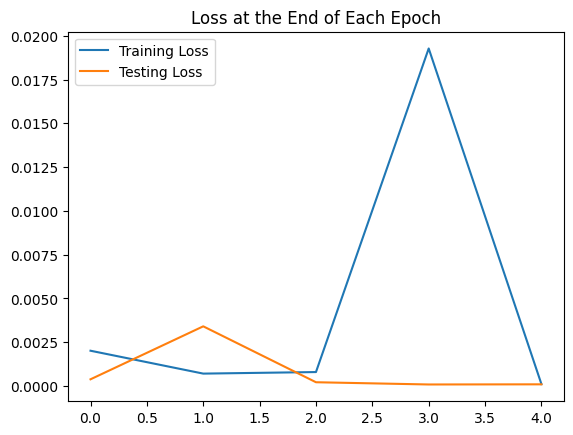

In [ ]:
# Graph result of each epoch
train_losses = [t.item() for t in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss at the End of Each Epoch')
plt.legend()

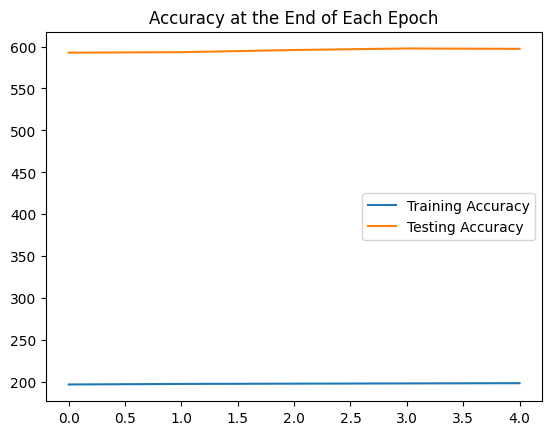

In [ ]:
# Graph accuracy of each epoch
plt.plot([t/600 for t in train_correct], label='Training Accuracy')
plt.plot([t/100 for t in test_correct], label='Testing Accuracy')
plt.title('Accuracy at the End of Each Epoch')
plt.legend()

In [ ]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [ ]:
with torch.no_grad():
  correct = 0
  for (X_test, y_test) in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()
print(f'Test Accuracy: {correct/len(test_data)}')

Test Accuracy: 0.9901999831199646


In [ ]:
# Test for correct
correct.item()/len(test_data) # To get the percent. Remove the /len(test_data)if you just want the raw number

0.9902

In [ ]:
# Grab an image
test_data[500] # Tensor with an image in it. At the end, it shows the label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# Grab just the data
test_data[500][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
# Reshape the tensor
test_data[500][0].reshape(28, 28) # 28x28 since that is the size of the MNIST pixels

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

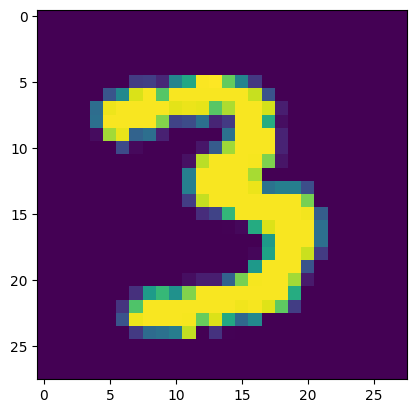

In [ ]:
# Show the image
plt.imshow(test_data[500][0].reshape(28, 28))

In [ ]:
# Pass the image through the model
model.eval()
with torch.no_grad():
  test_image = test_data[500][0].view(1, 1, 28, 28) # Batch size of 1, 1 color channel, 28x28 Image size
  new_prediction = model(test_image)

In [ ]:
# Check the new prediction...get probabilities
new_prediction

tensor([[-46.0346, -28.7507, -30.4223,   0.0000, -46.9932, -19.9781, -44.1777,
         -29.8886, -41.5139, -28.8254]])

In [ ]:
new_prediction.argmax().item()

3